<a href="https://colab.research.google.com/github/mojo-jojo-iot/ml/blob/main/image_randomforest_clf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from tensorflow.keras.datasets import mnist

In [ ]:
#loading the mnist dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

#flatten the images
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

In [ ]:
#normalize pixel values
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

In [ ]:
#Random forest model training
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
#predict and evaluate
y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Model accuracy: {accuracy * 100:.2f}%")

Model accuracy: 97.04%


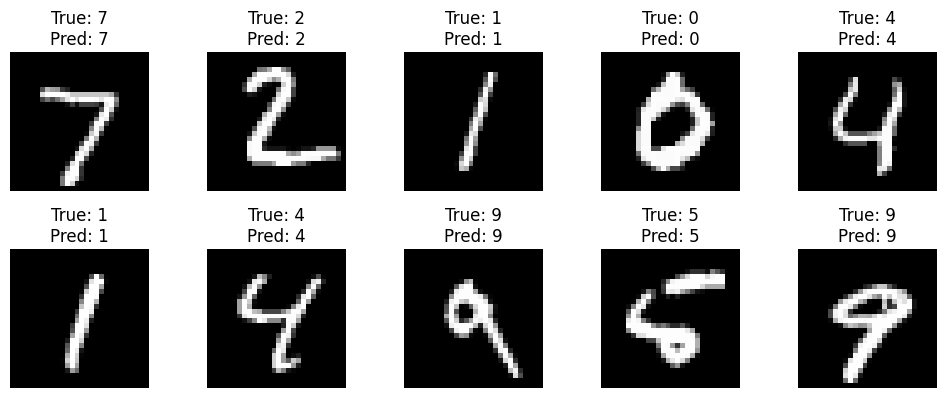

In [ ]:
import matplotlib.pyplot as plt
def visualize_predictions(images, true_labels, predicted_labels, num_images=10):
  plt.figure(figsize=(10, 10))
  for i in range(num_images):
    plt.subplot(5, 5, i+1)
    image = images[i].reshape(28, 28)
    plt.imshow(image, cmap='gray')
    plt.title(f"True: {true_labels[i]}\nPred: {predicted_labels[i]}")
    plt.axis('off')
  plt.tight_layout()
  plt.show()

visualize_predictions(X_test, y_test, y_pred, num_images=10)

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [ ]:
#generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

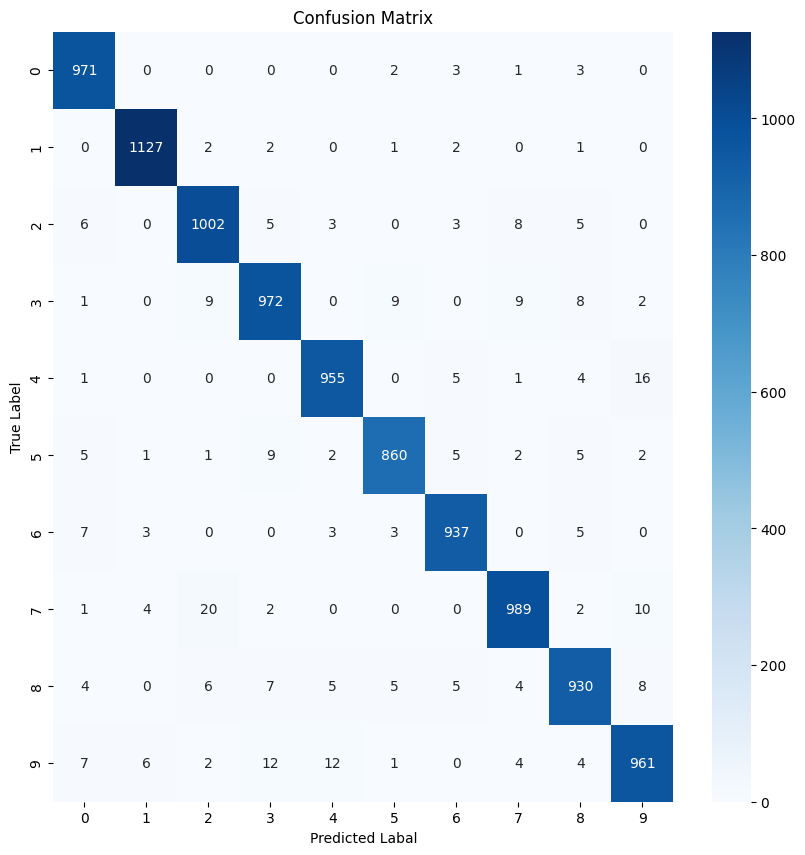

In [ ]:
#display confusion matrix using seaborn heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labal")
plt.ylabel("True Label")
plt.show()

In [ ]:
import PIL.ImageOps
from PIL import Image

In [ ]:
!wget https://thumb.ac-illust.com/3e/3e063ae7ffde52ad45fc15b75a6c10e7_t.jpeg
!mv 3e063ae7ffde52ad45fc15b75a6c10e7_t.jpeg image.jpeg
image_path = "image.jpeg"
image = Image.open(image_path).convert('L')
image = PIL.ImageOps.invert(image)
image = image.resize((28, 28))
image_array = np.array(image)
image_array = image_array.astype('float32') / 255.0

--2024-12-09 07:06:22--  https://thumb.ac-illust.com/3e/3e063ae7ffde52ad45fc15b75a6c10e7_t.jpeg
Resolving thumb.ac-illust.com (thumb.ac-illust.com)... 18.160.78.40, 18.160.78.81, 18.160.78.58, ...
Connecting to thumb.ac-illust.com (thumb.ac-illust.com)|18.160.78.40|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8361 (8.2K) [image/jpeg]
Saving to: ‘3e063ae7ffde52ad45fc15b75a6c10e7_t.jpeg’

3e063ae7ffde52ad45f 100%[===================>]   8.17K  --.-KB/s    in 0s      

2024-12-09 07:06:23 (112 MB/s) - ‘3e063ae7ffde52ad45fc15b75a6c10e7_t.jpeg’ saved [8361/8361]



In [ ]:
#reshape the image array for prediction
image_array = image_array.reshape(1, -1)

In [ ]:
#Make the prediction
predicted_label = rf_model.predict(image_array)[0]

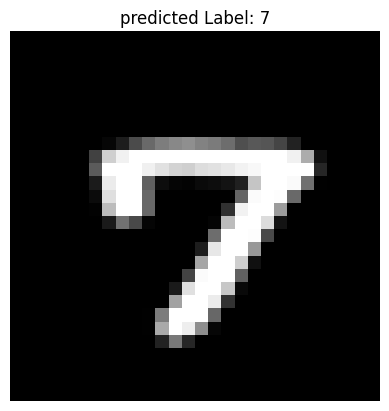

In [ ]:
plt.imshow(image_array.reshape(28, 28), cmap='gray')
plt.title(f"predicted Label: {predicted_label}")
plt.axis('off')
plt.show()

In [ ]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score

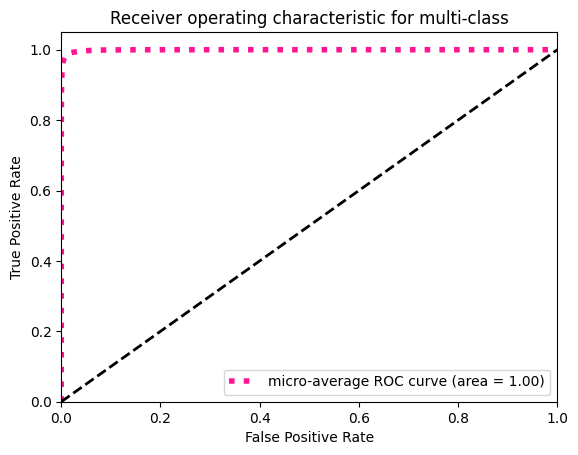

Average precision score, micro-averaged over all classes: 0.99


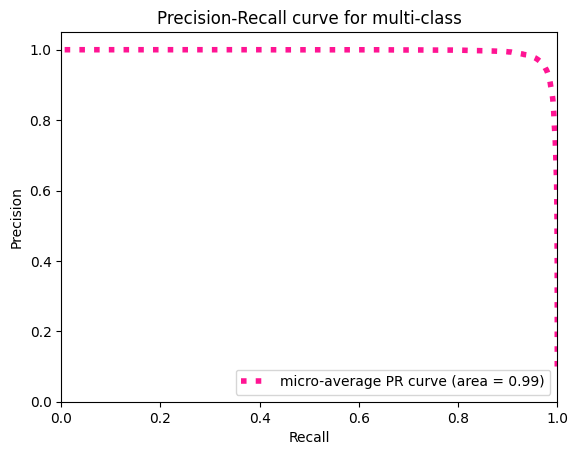

In [ ]:

from sklearn.preprocessing import label_binarize # Import label_binarize

# 1. ROC Curve and AUC for Multi-Class

# Get predicted probabilities for each class
y_probs = rf_model.predict_proba(X_test)

# Binarize the output
y_test_binarized = label_binarize(y_test, classes=np.unique(y_test))
n_classes = y_test_binarized.shape[1]

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):  # For each class (0-9)
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_binarized.ravel(), y_probs.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot ROC curve for micro-average
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

# Plot ROC curve for each class (optional)
# ... (You can add code to plot individual class ROC curves if needed) ...

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class')
plt.legend(loc="lower right")
plt.show()

# 2. Precision-Recall Curve and AUC for Multi-Class

# For each class
precision = dict()
recall = dict()
average_precision = dict()
for i in range(10):
    precision[i], recall[i], _ = precision_recall_curve(y_test == i, y_probs[:, i])
    average_precision[i] = average_precision_score(y_test == i, y_probs[:, i])

# A "micro-average": quantifying score on all classes jointly
precision["micro"], recall["micro"], _ = precision_recall_curve(y_test_binarized.ravel(),
    y_probs.ravel())
average_precision["micro"] = average_precision_score(y_test_binarized, y_probs, # Use binarized y_test
                                                     average="micro")
print('Average precision score, micro-averaged over all classes: {0:0.2f}'
      .format(average_precision["micro"]))

# Plot PR curve for micro-average
plt.figure()
plt.plot(recall["micro"], precision["micro"],
         label='micro-average PR curve (area = {0:0.2f})'
               ''.format(average_precision["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

# Plot PR curve for each class (optional)
# ... (You can add code to plot individual class PR curves if needed) ...

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve for multi-class')
plt.legend(loc="lower right")
plt.show()